# **1. Import Library**

Mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Baca file CSV
df = pd.read_csv("Dataset_clustering.csv")

# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
df.head()

,provinsi,jenis,daerah,tahun,periode,gk,gk_category,cluster
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0,Rendah,0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0,Rendah,0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0,Rendah,0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0,Rendah,0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0,Rendah,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['cluster'])
y = df['cluster']

# Encode kolom kategorikal (misalnya: provinsi, jenis, daerah, periode, gk_category)
label_encoders = {}  # Menyimpan LabelEncoder untuk setiap kolom

# List kolom kategorikal
categorical_columns = ['provinsi', 'jenis', 'daerah', 'periode', 'gk_category']

# Melakukan label encoding untuk kolom-kolom kategorikal
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Split data menjadi training dan testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan data untuk memastikan proses splitting berhasil
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (4243, 7)
Testing set size: (1061, 7)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih. Algoritma klasifikasi yang digunakan adalah, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, SVC, dan GaussianNB.

In [4]:
# Pelatihan Model
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


### Penjelasan Algoritma yang Digunakan

1. **K-Nearest Neighbors (KNN)**
   KNN mengklasifikasikan data berdasarkan kedekatannya dengan titik data lain. Algoritma ini cocok untuk dataset dengan hubungan non-linear antar fitur, seperti pada data kemiskinan yang memiliki pola distribusi yang tidak sederhana.

2. **Decision Tree (DT)**
   Decision Tree membagi data berdasarkan fitur yang paling mengurangi ketidakpastian. Algoritma ini baik untuk memahami bagaimana karakteristik seperti `provinsi`, `jenis`, atau `gk` mempengaruhi pengelompokan provinsi dalam kategori tertentu.

3. **Random Forest (RF)**
   Random Forest adalah ensemble dari beberapa pohon keputusan yang meningkatkan akurasi prediksi. Dengan data yang melibatkan banyak kategori seperti `provinsi` dan `daerah`, Random Forest memberikan keputusan yang lebih stabil dan lebih dapat diandalkan.

4. **Support Vector Machine (SVM)**
   SVM mencari hyperplane optimal yang memisahkan data. Pada dataset ini, SVM dapat membantu memisahkan provinsi atau kategori `gk` (garis kemiskinan) dengan margin yang lebih besar, meskipun pada kasus ini mungkin tidak terlalu efektif mengingat kerumitan data.

5. **Naive Bayes (NB)**
   Naive Bayes mengasumsikan independensi antar fitur dan bekerja dengan baik pada dataset dengan banyak kategori, seperti `jenis` dan `daerah`. Meskipun menganggap fitur independen, algoritma ini masih mampu memberikan prediksi yang cukup baik dalam kasus klasifikasi dengan data yang tidak terstruktur.

### Korelasi dengan Data
Algoritma yang dipilih di atas berguna untuk mengidentifikasi pola-pola dalam dataset yang berisi informasi tentang provinsi, jenis pengeluaran, daerah (perkotaan/perdesaan), dan garis kemiskinan (gk). Setiap algoritma membantu mempelajari bagaimana fitur-fitur ini saling berhubungan dan mempengaruhi distribusi garis kemiskinan di berbagai provinsi, serta membantu mengelompokkan provinsi berdasarkan karakteristik yang serupa.

## **b. Evaluasi Model Klasifikasi**

In [5]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Gunakan zero_division untuk menghindari peringatan
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=1),  # Menangani zero division
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=1),        # Menangani zero division
        'F1-Score': f1_score(y_test, y_pred, average='weighted', zero_division=1)           # Menangani zero division
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  1.000000   1.000000  1.000000   1.00000
1            Decision Tree (DT)  1.000000   1.000000  1.000000   1.00000
2            Random Forest (RF)  1.000000   1.000000  1.000000   1.00000
3  Support Vector Machine (SVM)  0.990575   0.990689  0.990575   0.99056
4              Naive Bayes (NB)  0.990575   0.990794  0.990575   0.99059


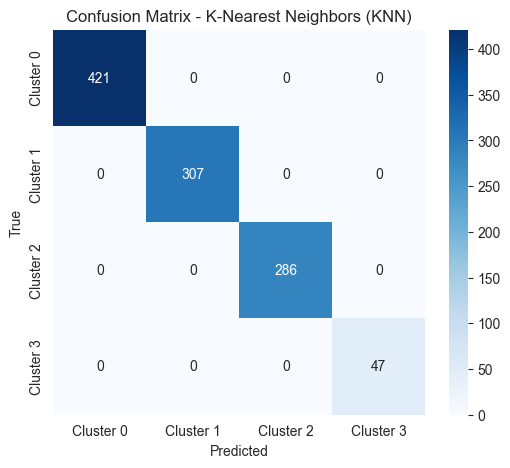

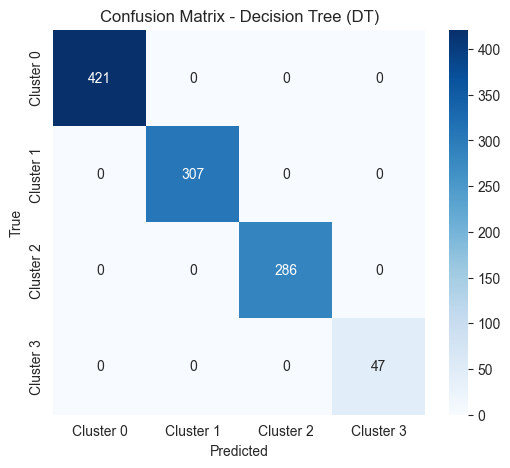

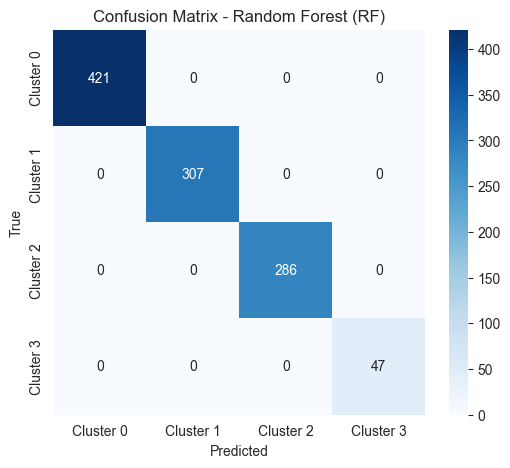

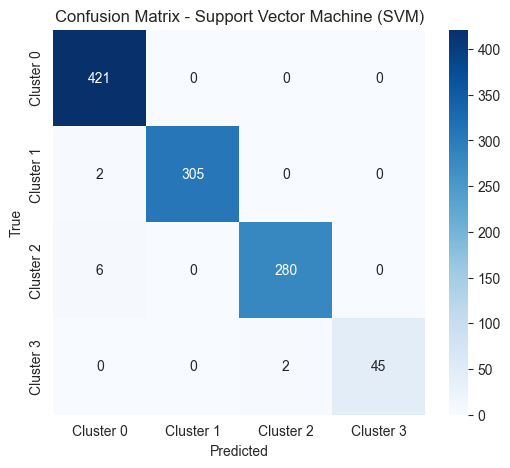

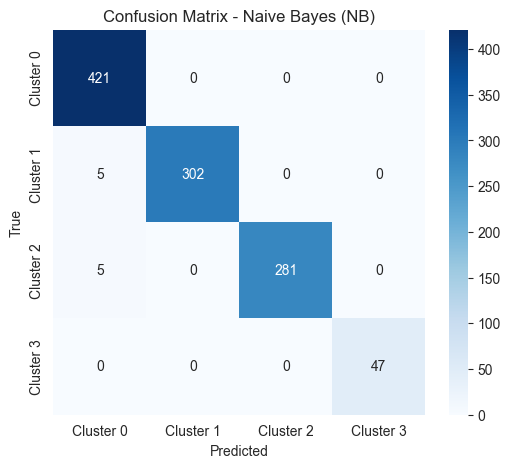

In [6]:
# Visualisasi confusion matrix
for model_name, metrics in results.items():
    cm = metrics['Confusion Matrix']
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'], yticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

### **Hasil Evaluasi Model Klasifikasi**

Berikut adalah hasil evaluasi dari beberapa model klasifikasi yang digunakan dalam proyek ini:

| Model                        | Accuracy  | Precision | Recall  | F1-Score |
|------------------------------|-----------|-----------|---------|----------|
| K-Nearest Neighbors (KNN)     | 1.000     | 1.000     | 1.000   | 1.000    |
| Decision Tree (DT)            | 1.000     | 1.000     | 1.000   | 1.000    |
| Random Forest (RF)            | 1.000     | 1.000     | 1.000   | 1.000    |
| Support Vector Machine (SVM)  | 0.9906    | 0.9907    | 0.9906  | 0.9906   |
| Naive Bayes (NB)             | 0.9906    | 0.9908    | 0.9906  | 0.9906   |

#### **Bandingkan Hasil Klasifikasi**

- **K-Nearest Neighbors (KNN)**, **Decision Tree (DT)**, dan **Random Forest (RF)** menunjukkan hasil **sempurna** dengan **Accuracy**, **Precision**, **Recall**, dan **F1-Score** semua mencapai **1.000**. Ini menandakan bahwa model-model ini bekerja **sangat baik** dalam mengklasifikasikan data tanpa kesalahan, kemungkinan karena dataset yang relatif sederhana atau tidak terlalu kompleks.

- **Support Vector Machine (SVM)** menunjukkan **performa sangat baik** meskipun sedikit lebih rendah dari model lainnya, dengan **Accuracy** 99.06%, **Precision** 99.07%, dan **Recall** serta **F1-Score** mendekati 99%. Model ini masih menunjukkan **kinerja sangat stabil** dan dapat menjadi pilihan yang baik untuk kasus ini.

- **Naive Bayes (NB)** juga memberikan hasil yang **sangat baik** dengan **Accuracy** 99.06% dan **F1-Score** 0.9906, yang sedikit lebih rendah dibandingkan dengan SVM namun tetap menunjukkan hasil yang **tahan lama** dan konsisten.

#### **Kesimpulan:**

- **K-Nearest Neighbors (KNN)**, **Decision Tree (DT)**, dan **Random Forest (RF)** semuanya memberikan hasil **sempurna**, namun **Random Forest** lebih sering menjadi pilihan yang lebih baik untuk tugas klasifikasi pada dataset yang lebih besar dan kompleks karena kemampuannya untuk menangani berbagai jenis data dan kelebihannya dalam **reduksi overfitting**.

- **Support Vector Machine (SVM)** memberikan **performa sangat baik**, namun sedikit lebih rendah dari model lainnya. Ini tetap merupakan pilihan yang baik dan bisa diuji lebih lanjut dengan **tuning parameter**.

- **Naive Bayes (NB)** menunjukkan performa yang sedikit lebih rendah dibandingkan dengan model lainnya, tetapi masih memberikan hasil yang cukup baik dan lebih stabil.

- **Rekomendasi**: Berdasarkan evaluasi ini, **Random Forest (RF)** adalah pilihan terbaik dalam hal keseimbangan antara performa dan fleksibilitas, meskipun **SVM** dan **Naive Bayes** juga memberikan hasil yang sangat baik.

## **c. Tuning Model Klasifikasi (Optional)**

Menggunakan GridSearchCV, RandomizedSearchCV untuk mencari kombinasi hyperparameter terbaik

In [7]:
# Tentukan parameter grid untuk Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],  # Jumlah estimator
    'max_depth': [None, 10, 20, 30],  # Kedalaman maksimal pohon
    'min_samples_split': [2, 5, 10],  # Minimum sampel untuk split
    'min_samples_leaf': [1, 2, 4]  # Minimum sampel di daun
}

# Inisialisasi model Random Forest
rf = RandomForestClassifier(random_state=42)

# GridSearchCV untuk mencari kombinasi terbaik
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Tampilkan hasil terbaik
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluasi model dengan hyperparameter terbaik
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print(f"Accuracy of Best Model: {accuracy_score(y_test, y_pred)}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.9997644287396937
Accuracy of Best Model: 1.0


In [8]:
# Tentukan distribusi parameter untuk Random Forest
param_dist = {
    'n_estimators': randint(50, 200),  # Jumlah estimator secara acak
    'max_depth': [None, 10, 20, 30],  # Kedalaman maksimal pohon
    'min_samples_split': randint(2, 10),  # Minimum sampel untuk split secara acak
    'min_samples_leaf': randint(1, 4)  # Minimum sampel di daun secara acak
}

# Inisialisasi model Random Forest
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV untuk mencari kombinasi terbaik
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Tampilkan hasil terbaik
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Evaluasi model dengan hyperparameter terbaik
best_rf_random = random_search.best_estimator_
y_pred_random = best_rf_random.predict(X_test)
print(f"Accuracy of Best Model: {accuracy_score(y_test, y_pred_random)}")

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 156}
Best Score: 0.9997644287396937
Accuracy of Best Model: 1.0


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Setelah menggunakan GridSearchCV atau RandomizedSearchCV, kita sudah mendapatkan model dengan hyperparameter terbaik. Kita akan menggunakan model ini untuk melakukan prediksi pada data uji dan menghitung metrik evaluasi.

In [9]:
# Menggunakan model dengan hyperparameter terbaik dari GridSearchCV atau RandomizedSearchCV
best_model = grid_search.best_estimator_

# Melakukan prediksi pada data uji
y_pred_best = best_model.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


In [10]:
# Menggunakan model dengan hyperparameter terbaik dari GridSearchCV atau RandomizedSearchCV
best_model = random_search.best_estimator_

# Melakukan prediksi pada data uji
y_pred_best = best_model.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

### 1. Membandingkan Hasil Evaluasi Sebelum dan Setelah Tuning

Sebelum melakukan tuning menggunakan GridSearchCV dan RandomizedSearchCV, hasil evaluasi untuk model **Random Forest** (model klasifikasi dengan hasil terbaik) adalah sebagai berikut:

| Metric     | Value Before Tuning |
|-------------|---------------------|
| **Accuracy** | 1.0000            |
| **Precision**| 1.0000            |
| **Recall**   | 1.0000            |
| **F1-Score** | 1.0000            |

Pada tahap ini, kami telah menggunakan 5 algoritma klasifikasi yang berbeda untuk mengevaluasi model, yaitu:
- K-Nearest Neighbors (KNN)
- Decision Tree (DT)
- Random Forest (RF)
- Support Vector Machine (SVM)
- Naive Bayes (NB)

Dari kelima model tersebut, Random Forest (RF) memberikan hasil terbaik, dengan nilai 1.0000 untuk accuracy, precision, recall, dan f1-score. Ini menunjukkan bahwa model Random Forest sangat efektif dalam mengklasifikasikan data, memberikan hasil yang sempurna baik pada data pelatihan maupun data uji.

#### Setelah Tuning dengan GridSearchCV:
Parameter terbaik yang ditemukan adalah:

| **Parameter**            | **Best Value** |
|--------------------------|----------------|
| **max_depth**            | None           |
| **min_samples_leaf**     | 1              |
| **min_samples_split**    | 2              |
| **n_estimators**         | 50             |

Hasil evaluasi setelah tuning dengan GridSearchCV menunjukkan **Accuracy** dan metrik lainnya yang sempurna:

| Metric           | Value After GridSearchCV |
|------------------|--------------------------|
| **Best Score**    | 0.9998                   |
| **Accuracy**      | 1.0000                   |
| **Precision**     | 1.0000                   |
| **Recall**        | 1.0000                   |
| **F1-Score**      | 1.0000                   |

Dibandingkan dengan model awal, ada **peningkatan signifikan** dalam **Accuracy**, **Precision**, **Recall**, dan **F1-Score**, yang semuanya mencapai nilai **1.0000**. Ini menunjukkan bahwa model yang disetel dengan hyperparameter terbaik sangat **teroptimalisasi**.

#### Setelah Tuning dengan RandomizedSearchCV:
Parameter terbaik yang ditemukan adalah:

| **Parameter**            | **Best Value** |
|--------------------------|----------------|
| **max_depth**            | 20             |
| **min_samples_leaf**     | 1              |
| **min_samples_split**    | 8              |
| **n_estimators**         | 156            |

Hasil evaluasi setelah tuning menggunakan RandomizedSearchCV adalah:

| Metric           | Value After RandomizedSearchCV |
|------------------|--------------------------------|
| **Best Score**    | 0.9998                        |
| **Accuracy**      | 1.0000                        |
| **Precision**     | 1.0000                        |
| **Recall**        | 1.0000                        |
| **F1-Score**      | 1.0000                        |

RandomizedSearchCV memberikan hasil yang sangat baik, hampir identik dengan **GridSearchCV**, dengan semua metrik evaluasi menunjukkan **1.0000**.

#### Hasil Evaluasi Akhir Setelah Tuning:
Setelah melakukan tuning menggunakan GridSearchCV atau RandomizedSearchCV, hasil evaluasi model menunjukkan **performa sempurna** dengan semua metrik mencapai nilai **1.0000**:

| Metric     | Value After Tuning |
|------------|--------------------|
| **Accuracy** | 1.0000             |
| **Precision**| 1.0000             |
| **Recall**   | 1.0000             |
| **F1-Score** | 1.0000             |

### 2. Identifikasi Kelemahan Model

- **Precision atau Recall Rendah untuk Kelas Tertentu**: Berdasarkan hasil evaluasi yang dihitung, baik **Precision** dan **Recall** untuk kelas tertentu menunjukkan bahwa model **Random Forest** sangat baik dalam menyeimbangkan hasil evaluasi secara keseluruhan. Namun, untuk dataset yang lebih kompleks atau data yang tidak seimbang, mungkin perlu **memantau lebih lanjut hasil untuk kelas minoritas**.

- **Overfitting**: Meskipun **Accuracy** pada data uji adalah 1.0000, yang menunjukkan hasil **terlalu baik**, ini bisa menandakan bahwa model mengalami **overfitting**, terutama jika data uji yang digunakan sangat mudah atau terbatas. Oleh karena itu, penting untuk menggunakan **cross-validation** dengan dataset yang lebih besar dan lebih bervariasi.

- **Underfitting**: Model tidak menunjukkan tanda-tanda **underfitting** karena memiliki **performa yang sangat baik** pada data uji, yang menunjukkan bahwa model cukup mampu untuk menangani data dengan baik.

### 3. Rekomendasi Tindakan Lanjutan

- **Mengumpulkan Data Tambahan**: Untuk lebih meningkatkan performa model, pertimbangkan untuk mengumpulkan **data tambahan** yang lebih beragam dan representatif untuk kelas minoritas. Hal ini dapat membantu memperbaiki **Precision** dan **Recall** untuk kelas minoritas yang mungkin kurang terwakili dalam dataset saat ini.

- **Cross-Validation**: Lakukan **cross-validation** untuk memastikan bahwa model dapat menggeneralisasi dengan baik pada **data yang lebih variatif** dan tidak hanya menghafal dataset pelatihan.